# Classification of Fire Types in India Using MODIS Satellite Data (2021–2023)

## Objective:

To develop a machine learning classification model that can accurately predict the type of fire using MODIS fire detection data for India from 2021 to 2023

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  accuracy_score,classification_report,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

## Load the dataset

In [2]:
df1 = pd.read_csv('modis_2021_India.csv')
df2 = pd.read_csv('modis_2022_India.csv')
df3 = pd.read_csv('modis_2023_India.csv')

In [3]:
df1.head() # print first 5 rows - df1.tail()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,28.0993,96.9983,303.0,1.1,1.1,2021-01-01,409,Terra,MODIS,44,6.03,292.6,8.6,D,0
1,30.0420,79.6492,301.8,1.4,1.2,2021-01-01,547,Terra,MODIS,37,6.03,287.4,9.0,D,0
2,30.0879,78.8579,300.2,1.3,1.1,2021-01-01,547,Terra,MODIS,8,6.03,286.5,5.4,D,0
3,30.0408,80.0501,302.0,1.5,1.2,2021-01-01,547,Terra,MODIS,46,6.03,287.7,10.7,D,0
4,30.6565,78.9668,300.9,1.3,1.1,2021-01-01,547,Terra,MODIS,43,6.03,287.6,9.0,D,0


In [4]:
df2.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,30.1138,80.0756,300.0,1.2,1.1,2022-01-01,511,Terra,MODIS,7,6.03,288.4,7.1,D,0
1,23.7726,86.2078,306.1,1.6,1.2,2022-01-01,512,Terra,MODIS,62,6.03,293.5,10.4,D,2
2,22.2080,84.8627,304.8,1.4,1.2,2022-01-01,512,Terra,MODIS,42,6.03,293.3,5.8,D,2
3,23.7621,86.3946,306.9,1.6,1.2,2022-01-01,512,Terra,MODIS,38,6.03,295.2,9.3,D,2
4,23.6787,86.0891,303.6,1.5,1.2,2022-01-01,512,Terra,MODIS,52,6.03,293.1,7.2,D,2


In [5]:
df3.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,9.3280,77.6247,318.0,1.1,1.0,2023-01-01,821,Aqua,MODIS,62,61.03,305.0,7.6,D,0
1,10.4797,77.9378,313.8,1.0,1.0,2023-01-01,822,Aqua,MODIS,58,61.03,299.4,4.3,D,0
2,13.2478,77.2639,314.7,1.0,1.0,2023-01-01,822,Aqua,MODIS,55,61.03,302.4,4.9,D,0
3,12.2994,78.4085,314.3,1.0,1.0,2023-01-01,822,Aqua,MODIS,58,61.03,301.9,4.8,D,0
4,14.1723,75.5024,338.4,1.2,1.1,2023-01-01,823,Aqua,MODIS,88,61.03,305.3,41.5,D,0


In [6]:
df = pd.concat([df1,df2,df3] , ignore_index=True)

In [7]:
df

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,28.0993,96.9983,303.0,1.1,1.1,2021-01-01,409,Terra,MODIS,44,6.03,292.6,8.6,D,0
1,30.0420,79.6492,301.8,1.4,1.2,2021-01-01,547,Terra,MODIS,37,6.03,287.4,9.0,D,0
2,30.0879,78.8579,300.2,1.3,1.1,2021-01-01,547,Terra,MODIS,8,6.03,286.5,5.4,D,0
3,30.0408,80.0501,302.0,1.5,1.2,2021-01-01,547,Terra,MODIS,46,6.03,287.7,10.7,D,0
4,30.6565,78.9668,300.9,1.3,1.1,2021-01-01,547,Terra,MODIS,43,6.03,287.6,9.0,D,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271212,17.1067,74.4049,304.0,2.3,1.5,2023-12-31,1715,Terra,MODIS,58,61.03,289.2,23.2,N,0
271213,16.3284,75.2590,304.2,2.6,1.5,2023-12-31,1715,Terra,MODIS,59,61.03,288.9,29.5,N,0
271214,21.1095,72.6422,306.5,1.9,1.3,2023-12-31,1716,Terra,MODIS,68,61.03,294.2,18.2,N,2
271215,21.0664,72.8734,310.0,1.0,1.0,2023-12-31,2125,Aqua,MODIS,79,61.03,292.7,10.2,N,2


In [8]:
df.shape #rows and cols

(271217, 15)

In [9]:
df.info() # dt , memc 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271217 entries, 0 to 271216
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   latitude    271217 non-null  float64
 1   longitude   271217 non-null  float64
 2   brightness  271217 non-null  float64
 3   scan        271217 non-null  float64
 4   track       271217 non-null  float64
 5   acq_date    271217 non-null  object 
 6   acq_time    271217 non-null  int64  
 7   satellite   271217 non-null  object 
 8   instrument  271217 non-null  object 
 9   confidence  271217 non-null  int64  
 10  version     271217 non-null  float64
 11  bright_t31  271217 non-null  float64
 12  frp         271217 non-null  float64
 13  daynight    271217 non-null  object 
 14  type        271217 non-null  int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 31.0+ MB


In [10]:
#any missing values?
df.isnull().sum()

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
# List out the column name to check 
df.columns

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_t31', 'frp', 'daynight', 'type'],
      dtype='object')

In [13]:
df.describe().T # statistics of dataset - numbers!

,count,mean,std,min,25%,50%,75%,max
latitude,271217.0,23.947505,4.919846,8.1362,20.9655,23.7888,27.7827,34.9734
longitude,271217.0,81.284024,6.559071,68.4526,75.8802,79.3209,84.7559,97.1044
brightness,271217.0,323.719192,14.147221,300.0000,314.5000,322.0000,330.7000,505.7000
scan,271217.0,1.421732,0.630742,1.0000,1.0000,1.2000,1.5000,4.8000
track,271217.0,1.152716,0.201943,1.0000,1.0000,1.1000,1.2000,2.0000
acq_time,271217.0,824.623755,353.966965,321.0000,648.0000,756.0000,825.0000,2202.0000
confidence,271217.0,64.065081,18.165329,0.0000,54.0000,66.0000,76.0000,100.0000
version,271217.0,21.933778,24.935515,6.0300,6.0300,6.0300,61.0300,61.0300
bright_t31,271217.0,303.499177,8.282440,267.2000,298.2000,302.5000,309.2000,400.1000
frp,271217.0,27.722058,81.017471,0.0000,8.7000,13.5000,24.5000,6961.8000


In [14]:
# check unique values for target variables 
df.type.value_counts()

0    257625
2     13550
3        42
Name: type, dtype: int64

## EDA


In [15]:
# check unique and n unique for all catagorial features 
for col in df.columns:
    if df[col].dtype == 'object' :
        print(f"column: {col}")
        print(f"Unique values: {df[col].unique()}")
        print(f"Number of unique values: {df[col].nunique()}")
        print("-" * 50)

column: acq_date
Unique values: ['2021-01-01' '2021-01-02' '2021-01-03' ... '2023-12-29' '2023-12-30'
 '2023-12-31']
Number of unique values: 1088
--------------------------------------------------
column: satellite
Unique values: ['Terra' 'Aqua']
Number of unique values: 2
--------------------------------------------------
column: instrument
Unique values: ['MODIS']
Number of unique values: 1
--------------------------------------------------
column: daynight
Unique values: ['D' 'N']
Number of unique values: 2
--------------------------------------------------


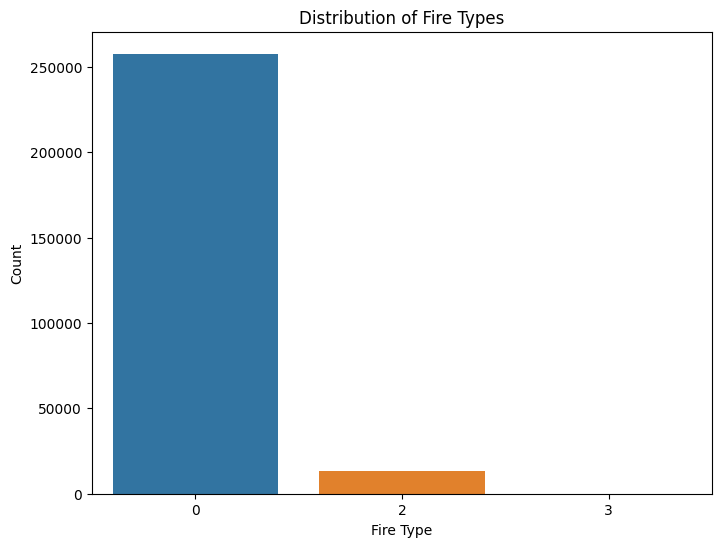

In [16]:
# count plot for 'type'
plt.figure(figsize =(8,6))
sns.countplot(x='type', data =df)
plt.title('Distribution of Fire Types')
plt.xlabel('Fire Type')
plt.ylabel('Count')
plt.show()

- The count plot shows the distribution of different fire types in the dataset.
- It is evident that 'MODIS' is the most frequent fire type, followed by 'VIRS'.
- The 'type' variable appers to be unbalanced, with 'MODIS' having significantly more observation than 'VIIRS'. 
- This imbalance might need to be considerd during model training.


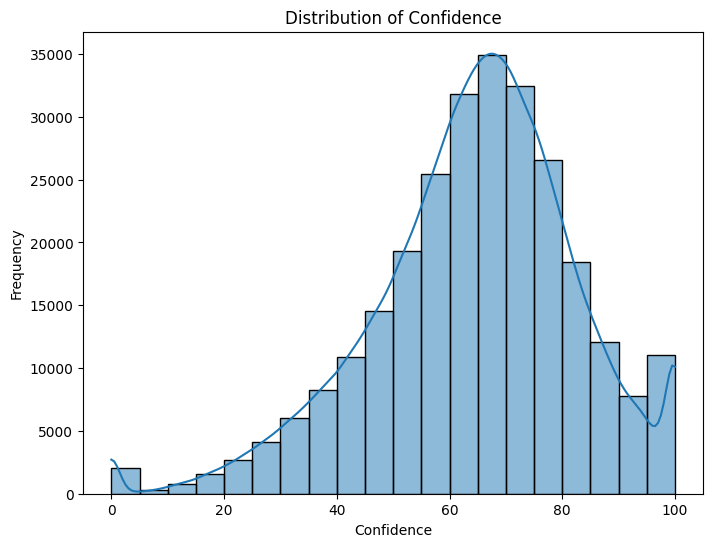

In [17]:
# Historgram of 'confidence'
plt.figure(figsize=(8,6))
sns.histplot(df['confidence'], bins=20 , kde= True)
plt.title('Distribution of Confidence')
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.show()

* The histogram illustration the distribution of the 'confidence' feature.
* The distribution appears to be bimodel, with peak around low confidence value and high confidence values.
* There are fewer observation in the middle range of confidence.
* This suggests that observation are often recorded with either low confidence or high confidence.